In [ ]:
!pip install panda
!pip install matplotlib
!pip install numpy
!pip install seaborn
!sudo apt-get install libgeos-dev
!pip install --user https://github.com/matplotlib/basemap/archive/master.zip
!pip install --user https://github.com/matplotlib/basemap/archive/v1.1.0.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [36]:
task = pd.read_excel('BI Task Sample Data.xlsx', converters={'Date': str})
task.describe()
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 15521 non-null  object
 1   Caption              15484 non-null  object
 2   Username             15521 non-null  object
 3   Full Name            14373 non-null  object
 4   Profile Picture URL  15521 non-null  object
 5   Comments             15521 non-null  int64 
 6   Likes                15521 non-null  int64 
 7   Type                 15521 non-null  object
 8   Filter               15521 non-null  object
 9   Link                 15521 non-null  object
 10  Latitude             15521 non-null  object
 11  Longitude            15521 non-null  object
 12  Location Name        15521 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.5+ MB


In [37]:
task['Date'] = task['Date'].str.replace('"', '', regex=False)
task['Date'] = pd.to_datetime(task['Date'], errors = 'ignore')

In [38]:
task['Date'].loc[0]

Timestamp('2015-12-23 00:00:00')

In [39]:
task[['Latitude','Longitude']] = task[['Latitude','Longitude']].replace('No location given.',0)

In [40]:
task['month'] = task['Date'].dt.month
task['year'] = task['Date'].dt.year


In [41]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
task[['Comments', 'Likes']].describe()

,Comments,Likes
count,15521.00,15521.00
mean,3.77,123.23
std,8.77,411.42
min,0.00,0.00
25%,0.00,12.00
50%,1.00,30.00
75%,4.00,93.00
max,308.00,9553.00


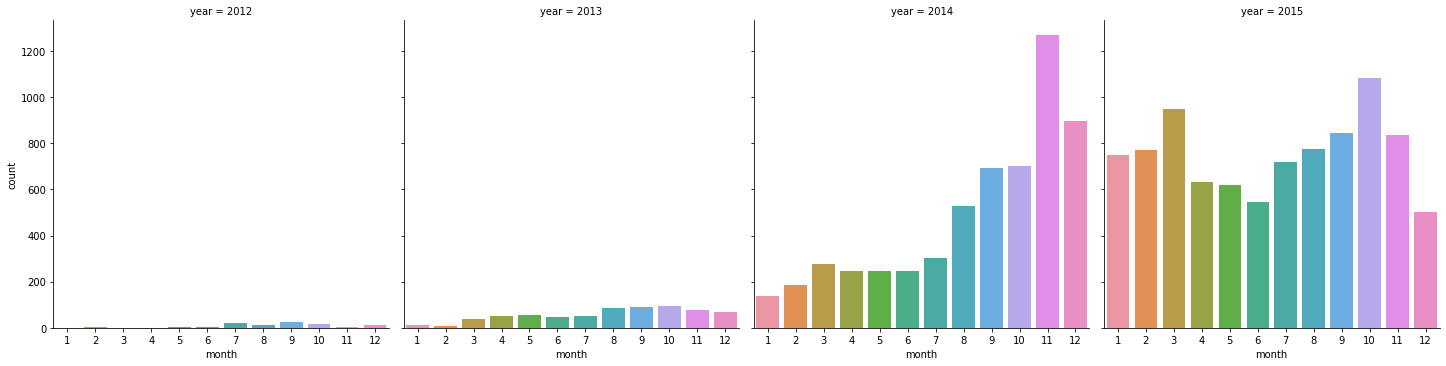

In [42]:
# Posts traffic by month, by year
sns.catplot(x="month", data = task,
            kind="count",
            col = "year")
plt.show()

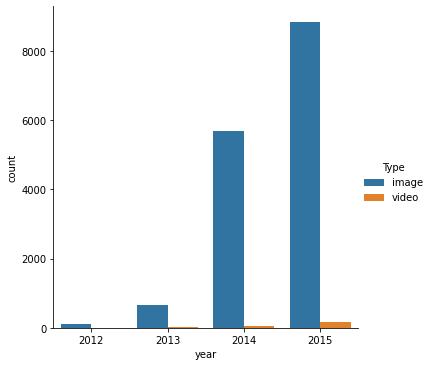

year  Type 
2012  image      98
2013  image     659
      video       9
2014  image    5674
      video      39
2015  image    8830
      video     175
Name: Caption, dtype: int64

In [43]:
# Total posts by type through years
t = sns.catplot(x = 'year', hue = 'Type', kind = 'count', data = task)
t.set_titles("Differntiate between Video vs Image")
plt.show()

task.groupby(['year','Type'])['Caption'].count()

In [44]:
dups = task[task.duplicated(subset = ['Username'])]
dups

,Date,Caption,Username,Full Name,Profile Picture URL,Comments,Likes,Type,Filter,Link,Latitude,Longitude,Location Name,month,year
7,2015-12-23,#Nailgamestrong #nailsonfleek #nailswag #matte...,nailsbycarmen818,Carmen_ela,https://scontent.cdninstagram.com/hphotos-xtp1...,0,19,image,Normal,https://www.instagram.com/p/_nqa6QEbgq/,0.00,0.00,No location given.,12,2015
8,2015-12-23,#AlpineSnow #white #snow #BallerinaShape #nail...,nailsbycarmen818,Carmen_ela,https://scontent.cdninstagram.com/hphotos-xtp1...,0,13,image,Normal,https://www.instagram.com/p/_nqNogkbgP/,0.00,0.00,No location given.,12,2015
22,2015-12-22,#nails #nailart #nailartist #opi #opiproducts ...,do_nails_ra,NaN,https://scontent.cdninstagram.com/hphotos-xpa1...,0,8,image,Normal,https://www.instagram.com/p/_mVp_9PG_U/,0.00,0.00,No location given.,12,2015
23,2015-12-22,#nails #nailart #nailartist #opi #redpassion #...,do_nails_ra,NaN,https://scontent.cdninstagram.com/hphotos-xpa1...,0,8,image,Normal,https://www.instagram.com/p/_mU0uvvG9B/,0.00,0.00,No location given.,12,2015
24,2015-12-22,#nails #nailart #nailartist #opi #opinails #op...,do_nails_ra,NaN,https://scontent.cdninstagram.com/hphotos-xpa1...,0,12,image,Normal,https://www.instagram.com/p/_mUB5TvG7T/,0.00,0.00,No location given.,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15511,2012-07-11,My nail polish for this week.. Need sunglasses...,liremseozreug,Esmeril Guerzo,https://scontent.cdninstagram.com/hphotos-xpt1...,9,28,image,Normal,https://www.instagram.com/p/M8Y0SrqPdw/,0.00,0.00,No location given.,7,2012
15512,2012-07-05,My nail polish for the week.. I applied black ...,liremseozreug,Esmeril Guerzo,https://scontent.cdninstagram.com/hphotos-xpt1...,1,28,image,Normal,https://www.instagram.com/p/Mr-DH3qPYH/,0.00,0.00,No location given.,7,2012
15513,2012-06-29,I applied black shatter by OPI over my care to...,liremseozreug,Esmeril Guerzo,https://scontent.cdninstagram.com/hphotos-xpt1...,4,20,image,Normal,https://www.instagram.com/p/Mc_Z7bKPQ9/,0.00,0.00,No location given.,6,2012
15514,2012-06-24,My nail polish for this week... #opi #nail #na...,liremseozreug,Esmeril Guerzo,https://scontent.cdninstagram.com/hphotos-xpt1...,3,32,image,Normal,https://www.instagram.com/p/MP-NuxqPUL/,0.00,0.00,No location given.,6,2012


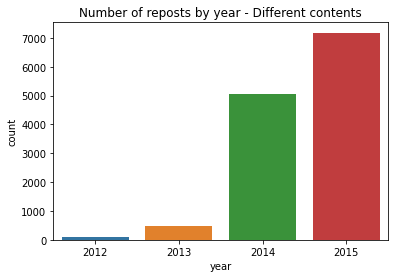

In [45]:
h = sns.countplot(x = 'year', data = dups)
h.set_title("Number of reposts by year - Different contents")
plt.show()

In [46]:
# Number of reposts by year
dups.groupby('year')['Caption'].count()

year
2012      82
2013     482
2014    5028
2015    7169
Name: Caption, dtype: int64

In [47]:
# Number of likes from reposts by year
dups.groupby('year')['Likes'].sum()

year
2012       6706
2013      44614
2014     324189
2015    1294070
Name: Likes, dtype: int64

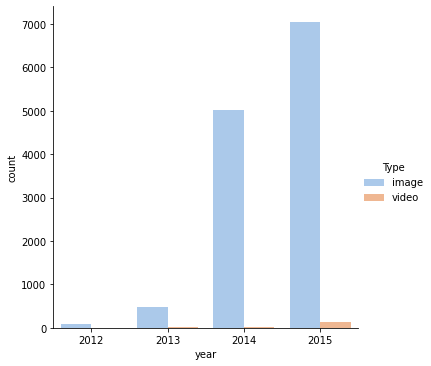

year  Type 
2012  image      82
2013  image     474
      video       8
2014  image    4999
      video      29
2015  image    7040
      video     129
Name: Caption, dtype: int64

In [50]:
a = sns.catplot(x = 'year', hue = 'Type', kind = 'count', palette = 'pastel', data = dups)
a.set_titles("Differentiate between Video vs Image -Reposts with different caption")
plt.show()

dups.groupby(['year','Type'])['Caption'].count()

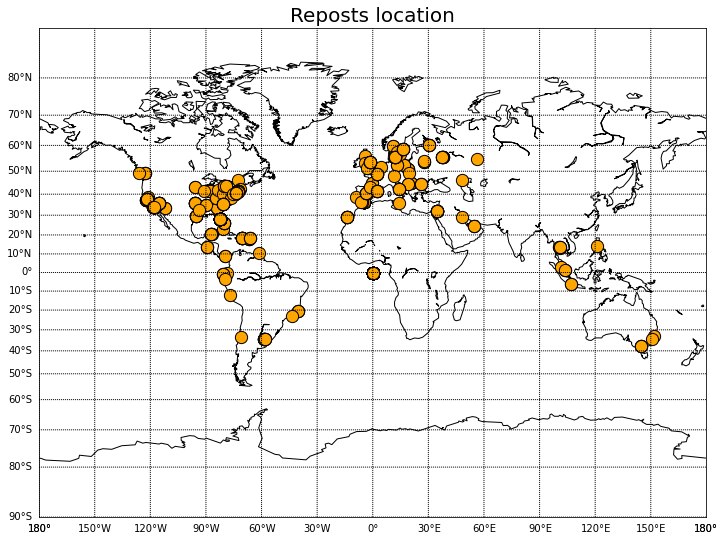

In [51]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = dups['Latitude'].tolist()
sites_lon_x = dups['Longitude'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=150, c= 'orange', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Reposts location', fontsize=20)

plt.show()

In [52]:
duplicates = task[task.duplicated(subset = ['Username','Date','Caption'])]
duplicates

,Date,Caption,Username,Full Name,Profile Picture URL,Comments,Likes,Type,Filter,Link,Latitude,Longitude,Location Name,month,year
44,2015-12-21,Tag a friend who'd like this!! #luxenails215 #...,luxenails215,LuxeNails215,https://scontent.cdninstagram.com/hphotos-xtf1...,1,219,image,Normal,https://www.instagram.com/p/_jwdDOvatq/,0.00,0.00,No location given.,12,2015
45,2015-12-21,Tag a friend who'd like this!! #luxenails215 #...,luxenails215,LuxeNails215,https://scontent.cdninstagram.com/hphotos-xtf1...,1,196,image,Normal,https://www.instagram.com/p/_jvvlOPasT/,0.00,0.00,No location given.,12,2015
46,2015-12-21,Tag a friend who'd like this!! #luxenails215 #...,luxenails215,LuxeNails215,https://scontent.cdninstagram.com/hphotos-xtf1...,2,152,image,Normal,https://www.instagram.com/p/_jvsALvasQ/,0.00,0.00,No location given.,12,2015
47,2015-12-21,Tag a friend who'd like this!! #luxenails215 #...,luxenails215,LuxeNails215,https://scontent.cdninstagram.com/hphotos-xtf1...,0,92,image,Normal,https://www.instagram.com/p/_jvpzEvasK/,0.00,0.00,No location given.,12,2015
50,2015-12-21,#getluxed #nailart #naildesigns #philly #phill...,luxenails215,LuxeNails215,https://scontent.cdninstagram.com/hphotos-xtf1...,1,178,image,Normal,https://www.instagram.com/p/_jpYocvavB/,0.00,0.00,No location given.,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,2013-09-17,@bloomdotcom @opi_products #nailart #contest #...,bossladyterrie,Siterria Nelson,https://scontent.cdninstagram.com/hphotos-xaf1...,0,4,image,Normal,https://www.instagram.com/p/eXvnVRiJTm/,0.00,0.00,No location given.,9,2013
15095,2013-08-25,This weeks nail design is called Glitterfied Z...,newenglandnails,Sheril Fearon,https://scontent.cdninstagram.com/hphotos-ash/...,0,4,image,Normal,https://www.instagram.com/p/dawQG8lqbY/,0.00,0.00,No location given.,8,2013
15096,2013-08-25,This weeks nail design is called Glitterfied Z...,newenglandnails,Sheril Fearon,https://scontent.cdninstagram.com/hphotos-ash/...,0,2,image,Normal,https://www.instagram.com/p/davr5XFqag/,0.00,0.00,No location given.,8,2013
15206,2013-07-02,"I'm usually a 'manicure Monday' girl, but my s...",stylebyscheron,Scheron,https://scontent.cdninstagram.com/hphotos-xtp1...,0,7,image,Normal,https://www.instagram.com/p/bRucvOCywq/,40.74,-73.99,stelladot.com/scheron,7,2013


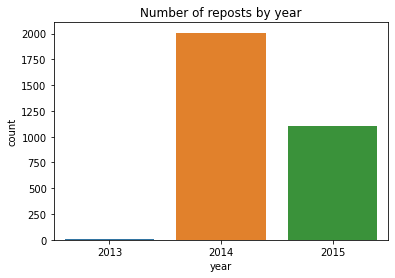

In [53]:
g = sns.countplot(x = 'year', data = duplicates)
g.set_title("Number of reposts by year")
plt.show()

In [54]:
# Number of reposts by year
duplicates.groupby('year')['Caption'].count()

year
2013       6
2014    2009
2015    1105
Name: Caption, dtype: int64

In [55]:
#Number of total likes of reposts by year
duplicates.groupby('year')['Likes'].sum()

year
2013        26
2014     60353
2015    207141
Name: Likes, dtype: int64

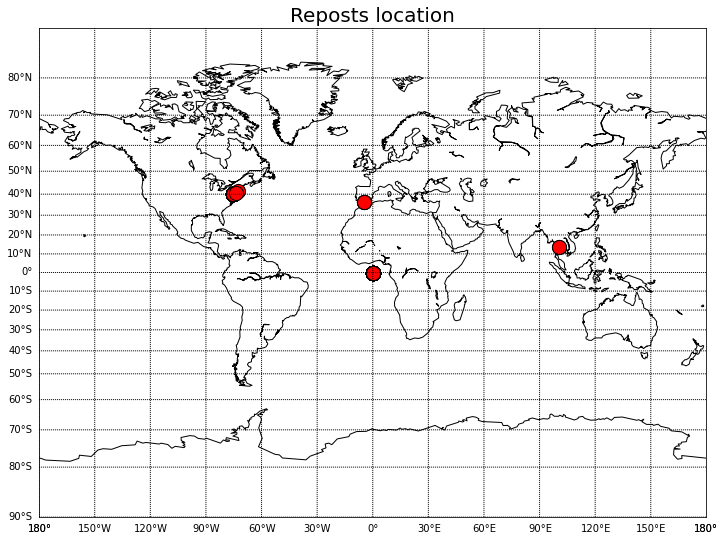

In [56]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = duplicates['Latitude'].tolist()
sites_lon_x = duplicates['Longitude'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=200, c= 'red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Reposts location', fontsize=20)

plt.show()